In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [68]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [69]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [84]:
df.index.to_series()

date
2016-05-19   2016-05-19
2016-05-26   2016-05-26
2016-05-27   2016-05-27
2016-05-28   2016-05-28
2016-05-29   2016-05-29
                ...    
2019-11-24   2019-11-24
2019-11-29   2019-11-29
2019-11-30   2019-11-30
2019-12-01   2019-12-01
2019-12-03   2019-12-03
Name: date, Length: 1238, dtype: datetime64[ns]

AttributeError: 'Timestamp' object has no attribute 'split'

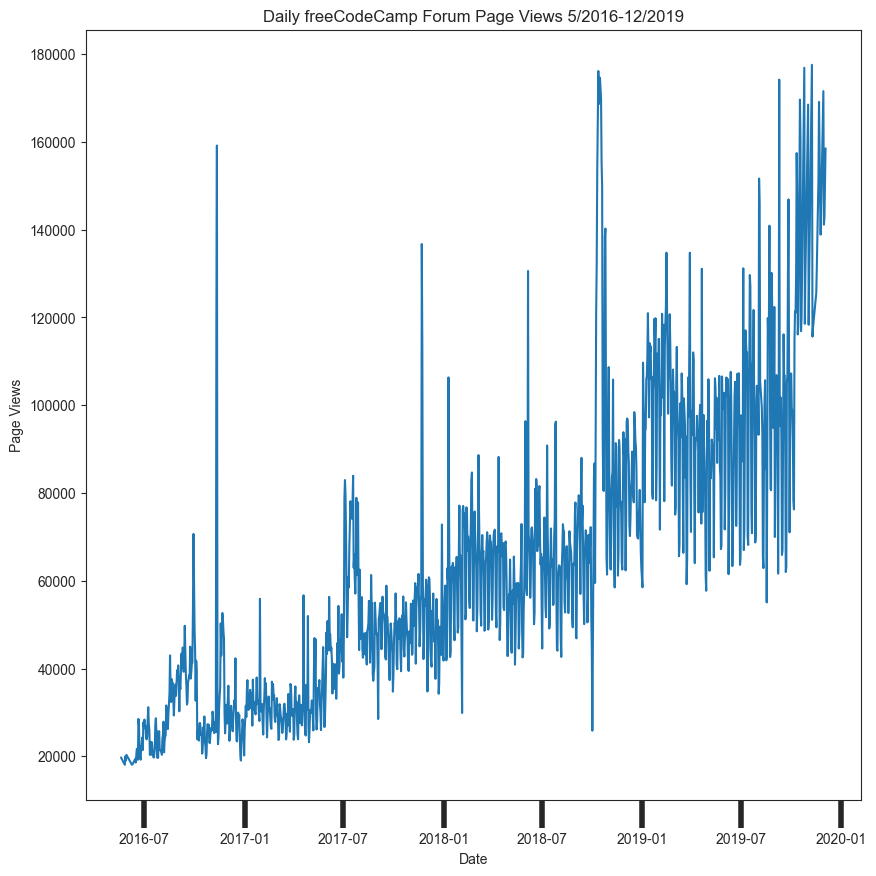

In [96]:
# Draw line plot
fig, ax = plt.subplots(figsize=(10,10))
fig = sns.lineplot(data=df, x='date', y='value')
fig.set_xlabel('Date')
fig.set_ylabel('Page Views')
fig.set(title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
xticklabels = []
for i in range (0, 1238):
    string = f"{df.index[i].year}-{df.index[i].month}"
    if ((df.index[i].split('-')[1] == "01") | (df.index[i].split('-')[1] == "07")) & (string not in xticklabels):
        xticklabels.append(string)
fig.set_xticks(range(7))
fig.set_xticklabels(xticklabels)


In [14]:
xticklabels

['2016-07', '2017-01', '2017-07', '2018-01', '2018-07', '2019-01', '2019-07']

In [ ]:
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig